In [45]:
import pandas as pd
import numpy as np

import cv2
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.utils.np_utils import to_categorical

from PIL import Image
from pathlib import Path
import imagesize
import random


import pickle

import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from pathlib import Path

from keras.preprocessing import image

from keras.models import model_from_json

from sklearn.metrics import classification_report, confusion_matrix



In [46]:
# to fix dead kernel issue when fitting my model
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# <font color=Brown> Data Preprocessing
Reading in image data adapted from sentdex
https://www.youtube.com/watch?v=j-3vuBynnOE

In [47]:
#  directory to my data
DataDir_train= "/Users/sarahalbadri/Desktop/Face Mask Usage/partinioned data/train"
# classes
categories= ['fully_covered', 'not_covered', 'partially_covered']

In [48]:
# iterate through all images in 
# images already in grayscale
for cat in categories:
    path = os.path.join(DataDir_train, cat)# path to dir:'fully_covered', 'not_covered', 'partially_covered'
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)# covert images to array-gray scale

In [49]:
# lets check my data after I converted to array
print(img_array)

[[151 150 152 ... 151 148 151]
 [149 124  91 ...  30  37  65]
 [150 108  71 ...  24  29  68]
 ...
 [152  51  48 ...  46  47  75]
 [146  52  48 ...  48  46  72]
 [152  73  80 ...  74  70  94]]


# <font color = red>Lets unify the shape of the images.</font>
### <font color = brown> Image size is crucial for CNN performance. I tried different sizes and 64 * 64 yielded the best performance 
## Check image shape
## resize to the dsired shape

In [50]:
img_array.shape

(64, 64)

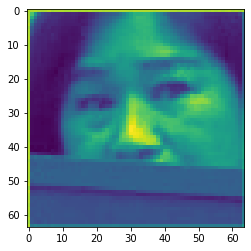

In [51]:
# for resizing img
#  using same image size 64*64- tried multiple sizes 
IMG_SIZE = 64
new_array =cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()
                      

# Training set

In [52]:
training_data=[]

def create_training_data():
    for cat in categories:
        path = os.path.join(DataDir_train, cat)
        class_num= categories.index(cat) # map class to  numeric value
        for img in os.listdir(path):
            img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)# covert images to array-gray scale
            new_array =cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
            
create_training_data()

In [53]:
print(len(training_data))

3853


In [54]:
# shuffle data to prevent overfitting- shuffleing reduce variance
random.shuffle(training_data)

In [55]:
#create features and labels
x_train=[]# features set
y_train=[] # labels 


In [56]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
x_train = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [57]:

pickle_out= open("x_train_64CNN_NoFace.pickle", "wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()


pickle_out= open("y_train_64CNN_NoFace.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [58]:
pickle_in= open("x_train_64CNN_NoFace.pickle", "rb")
x_train = pickle.load(pickle_in)

In [59]:
pickle_in= open("y_train_64CNN_NoFace.pickle", "rb")
y_train = pickle.load(pickle_in)

# Validation set

In [60]:
DataDir_val= "/Users/sarahalbadri/Desktop/Face Mask Usage/partinioned data/val"
categories= ['fully_covered', 'not_covered', 'partially_covered']

In [61]:
for cat in categories:
    path = os.path.join(DataDir_val, cat)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)# covert images to array-gray scale

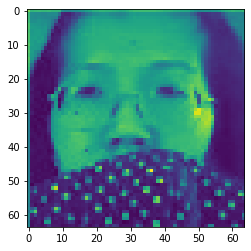

In [62]:
# resize
IMG_SIZE = 64
new_array =cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [63]:
validation_data=[]

def create_validation_data():
    for cat in categories:
        path = os.path.join(DataDir_val, cat)
        class_num= categories.index(cat)
        for img in os.listdir(path):
            img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)# covert images to array-gray scale
            new_array =cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            validation_data.append([new_array, class_num])
            
create_validation_data()

In [64]:
print(len(validation_data))

1100


In [65]:
random.shuffle(validation_data)

In [66]:
x_val=[]
y_val=[]



In [67]:
for features, label in validation_data:
    x_val.append(features)
    y_val.append(label)
x_val = np.array(x_val).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [68]:

pickle_out= open("x_val_64CNN_NoFace.pickle", "wb")
pickle.dump(x_val, pickle_out)
pickle_out.close()


pickle_out= open("y_val_64CNN_NoFace.pickle", "wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

In [69]:
pickle_in= open("x_val_64CNN_NoFace.pickle", "rb")
x_val = pickle.load(pickle_in)

In [70]:
pickle_in= open("y_val_64CNN_NoFace.pickle", "rb")
y_val = pickle.load(pickle_in)

In [71]:
DataDir_test= "/Users/sarahalbadri/Desktop/Face Mask Usage/partinioned data/test"
categories= ['fully_covered', 'not_covered', 'partially_covered']

# Test set

In [72]:
for cat in categories:
    path = os.path.join(DataDir_test, cat)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)# covert images to array-gray scale
        

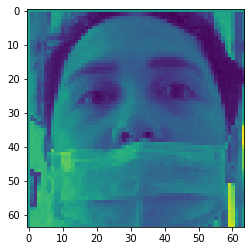

In [73]:
# resize
IMG_SIZE = 64
new_array =cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [74]:
test_data=[]

def create_test_data():
    for cat in categories:
        path = os.path.join(DataDir_test, cat)
        class_num= categories.index(cat)
        for img in os.listdir(path):
            img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)# covert images to array-gray scale
            new_array =cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_array, class_num])
            
create_test_data()

In [75]:
print(len(test_data))

554


In [76]:
random.shuffle(test_data)

In [77]:
x_test=[]
y_test=[]



In [78]:
for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
x_test = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)# img size assigned earlier, and the 1 at the end bc we have gray scal images

In [79]:

pickle_out= open("x_test_64CNN_NoFace.pickle", "wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()


pickle_out= open("y_test_64CNN_NoFace.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [80]:
pickle_in= open("x_test_64CNN_NoFace.pickle", "rb")
x_test = pickle.load(pickle_in)

In [81]:
pickle_in= open("y_test_64CNN_NoFace.pickle", "rb")
y_test = pickle.load(pickle_in)

In [82]:
# Lets Normalize data set to 0-to1 range
x_train = x_train.astype("float32") 
x_test = x_test.astype("float32") 
x_val = x_val.astype("float32") 

x_train = x_train/255
x_test = x_test/255
x_val = x_val/255

In [83]:
# Converts a class vector to binary class matrix.
# labels are single values from 0 to 2, want to make each label an array with element set to 1 and and the rest set to 0.

y_train = keras.utils.to_categorical(y_train, 3)
y_test = keras.utils.to_categorical(y_test,3)
y_val = keras.utils.to_categorical(y_val,3)

In [84]:
# lets build the model 
model = Sequential()
# add 2d convolutional layers as I am working with images
# first parameter: num of filters in layers(will use 32)each filter can detect one pattern in image 
#second paramter: window size we use when we create image tiles from each image (will use 3 *3 )
model.add(Conv2D(32, (3, 3), padding= "same", activation ="relu", input_shape=(64,64,1)))# add padding to prevent losing info from pixles on the edges of the image
model.add(Conv2D(32, (3, 3), activation ="relu"))# add padding to prevent losing info from pixles on the edges of the image
# use maxpooling to scale down the convolutional layers by keeping the largest values and throw away the smaller ones( it keeps the most usueful data) 
model.add(MaxPooling2D(pool_size=(2,2)))# used 2 pix * 2 pix pool size
# dropout: to prevent neural network from memorizing. NN tend to memorize instead of learning. by adding dropout we randomly throw away some of the data by cutting connection btw layers
model.add(Dropout(0.25))# pass percentage of neural network that you want to drop
# lets add 2 more layers with 64 filters to each
model.add(Conv2D(64, (3, 3), padding= "same", activation ="relu"))# add padding to prevent losing info from pixles on the edges of the image
model.add(Conv2D(64, (3, 3), activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# add flatten layer before transitioning to dense layer to tell keras that we no longer working with 2d data
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.50))# this makes the neural network work harder to get the correct answer
model.add(Dense(3, activation="softmax"))

In [85]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)       

In [86]:
# lets compile the neural network
model.compile(
    loss= "categorical_crossentropy",
    optimizer= "adam",
    metrics=["accuracy"]
    
)

In [87]:
import tensorflow as tf
# create callback to stop training early to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [88]:
# lets train the model
class_weights = {
    0:"0.35", # 'fully_covered'
    1:"0.3", #'not_covered'
    2:"0.35" #'partially_covered'
}
history= model.fit(x_train,
                   y_train,
                   batch_size= 32,
                   epochs= 50,
                   validation_data= (x_val, y_val),
                   class_weight= class_weights,
                   callbacks=[stop_early])

Train on 3853 samples, validate on 1100 samples
Epoch 1/50
3853/3853 [==============================] - 38s 10ms/step - loss: 0.1688 - accuracy: 0.7843 - val_loss: 0.2256 - val_accuracy: 0.9291
Epoch 2/50
3853/3853 [==============================] - 35s 9ms/step - loss: 0.0665 - accuracy: 0.9291 - val_loss: 0.1171 - val_accuracy: 0.9582
Epoch 3/50
3853/3853 [==============================] - 35s 9ms/step - loss: 0.0397 - accuracy: 0.9598 - val_loss: 0.0927 - val_accuracy: 0.9673
Epoch 4/50
3853/3853 [==============================] - 35s 9ms/step - loss: 0.0296 - accuracy: 0.9709 - val_loss: 0.0698 - val_accuracy: 0.9764
Epoch 5/50
3853/3853 [==============================] - 35s 9ms/step - loss: 0.0185 - accuracy: 0.9800 - val_loss: 0.0744 - val_accuracy: 0.9773
Epoch 6/50
3853/3853 [==============================] - 35s 9ms/step - loss: 0.0203 - accuracy: 0.9790 - val_loss: 0.0612 - val_accuracy: 0.9755
Epoch 7/50
3853/3853 [==============================] - 35s 9ms/step - loss: 0.01

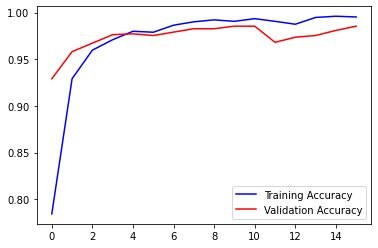

In [89]:
# lets visualize our training and validation accuracy
epochs= range(16)
train_acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
plt.plot(epochs,train_acc, 'b-', label='Training Accuracy' )
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.xlabel= ('Epochs')
plt.ylabel= ('Accuracy')
plt.legend()
plt.show()


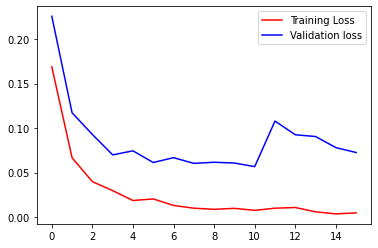

In [90]:
# visulaize training and validation loss
epochs= range(16)
train_loss= history.history['loss']
val_loss= history.history['val_loss']
plt.plot(epochs, train_loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.xlabel=('Epochs')
plt.ylabel=('Loss')
plt.legend()
plt.show()

 # Evaluate our model on full test set



In [91]:
 # Evaluate our model on full test set
loss_and_acc = model.evaluate(x_test, y_test)
print('loss =' +str(loss_and_acc[0]))
print('accuracy =' + str(loss_and_acc[1]))

554/554 [==============================] - 2s 3ms/step
loss =0.14995488230351653
accuracy =0.9783393740653992


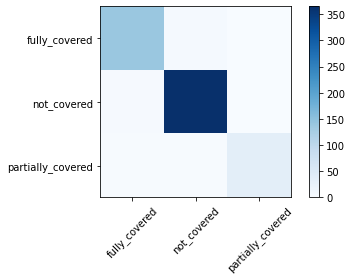

In [92]:

preds = np.round(model.predict(x_test),0)
classes = ['fully_covered', 'not_covered', 'partially_covered']
categorical_test_labels = pd.DataFrame(y_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix = confusion_matrix(categorical_test_labels, categorical_preds)
plt.imshow(confusion_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.tight_layout()


# <font color = brown>Model predictions</font>

# lets check the model on fully covered image

In [97]:
# Evaluating our model
# Load an image file to test, resizing it to 64* 64 pix
# will load image from fully covered
img = image.load_img("/Users/sarahalbadri/Desktop/Face Mask Usage/data/fully_covered/aywxgsyn.jpg", target_size=(64,64))

In [98]:
# Convert the image to a numpy array
image_to_test = image.img_to_array(img)/255



In [99]:
# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)
list_of_images=list_of_images.reshape(-1,64,64,1)

In [100]:
# Make a prediction using the model
results = model.predict(list_of_images)

In [101]:
# Since we are only testing one image, we only need to check the first result
single_result = results[0]

In [102]:
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [103]:
# Get the name of the most likely class
class_labels= ['fully_covered', 'not_covered','partially_covered']
class_label = class_labels[most_likely_class_index]

# Print the result
print(f"This is image is a {class_label} - Likelihood:{class_likelihood} ")

This is image is a fully_covered - Likelihood:0.9999958276748657 


# lets check on not covered

In [104]:
# lets check model classifiation for not covered class 
img = image.load_img("/Users/sarahalbadri/Desktop/Face Mask Usage/data/not_covered/acteznhe.jpg", target_size=(64,64))

In [105]:
# Convert the image to a numpy array
image_to_test = image.img_to_array(img)/255



In [106]:
# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)
list_of_images=list_of_images.reshape(-1,64,64,1)

In [107]:
# Make a prediction using the model
results = model.predict(list_of_images)

In [108]:
# Since we are only testing one image, we only need to check the first result
single_result = results[0]

In [109]:
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [110]:
# Get the name of the most likely class
class_labels= ['fully_covered', 'not_covered', 'partially_covered']
class_label = class_labels[most_likely_class_index]

# Print the result
print(f"This is image is a {class_label} - Likelihood:{class_likelihood} ")

This is image is a not_covered - Likelihood:0.9999983310699463 


# lets check on partially covered

In [111]:
# lets check model classifiation for not covered class 
img = image.load_img("/Users/sarahalbadri/Desktop/Face Mask Usage/data/partially_covered/aunfzfou.jpg", target_size=(64,64))

In [112]:
# Convert the image to a numpy array
image_to_test = image.img_to_array(img)/255




In [113]:
# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)
list_of_images=list_of_images.reshape(-1,64,64,1)

In [114]:
# Make a prediction using the model
results = model.predict(list_of_images)

In [115]:
# Since we are only testing one image, we only need to check the first result
single_result = results[0]

In [116]:
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

In [117]:
# Get the name of the most likely class
class_labels= ['fully_covered', 'not_covered', 'partially_covered']
class_label = class_labels[most_likely_class_index]

# Print the result
print(f"This is image is a {class_label} - Likelihood:{class_likelihood} ")

This is image is a not_covered - Likelihood:0.9932543635368347 
